# 1. 라이브러리

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# plot에서 한글 폰트 지정
font_name=matplotlib.font_manager.FontProperties(
        fname='C:/Windows/Fonts/malgun.ttf').get_name()
matplotlib.rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

In [4]:
data.head()

REG_YYMM CARD_SIDO_NM CARD_CCG_NM STD_CLSS_NM HOM_SIDO_NM HOM_CCG_NM  AGE  \
0    201901           강원         강릉시  건강보조식품 소매업          강원        강릉시  20s   
1    201901           강원         강릉시  건강보조식품 소매업          강원        강릉시  30s   
2    201901           강원         강릉시  건강보조식품 소매업          강원        강릉시  30s   
3    201901           강원         강릉시  건강보조식품 소매업          강원        강릉시  40s   
4    201901           강원         강릉시  건강보조식품 소매업          강원        강릉시  40s   

   SEX_CTGO_CD  FLC  CSTMR_CNT      AMT  CNT  
0            1    1          4   311200    4  
1            1    2          7  1374500    8  
2            2    2          6   818700    6  
3            1    3          4  1717000    5  
4            1    4          3  1047300    3

In [5]:
# find null
data.isnull().sum()

REG_YYMM             0
CARD_SIDO_NM         0
CARD_CCG_NM      87213
STD_CLSS_NM          0
HOM_SIDO_NM          0
HOM_CCG_NM      147787
AGE                  0
SEX_CTGO_CD          0
FLC                  0
CSTMR_CNT            0
AMT                  0
CNT                  0
dtype: int64

In [6]:
# delete null col
data.drop(['CARD_CCG_NM', 'HOM_CCG_NM'], axis = 1, inplace = True)
data.head()

REG_YYMM CARD_SIDO_NM STD_CLSS_NM HOM_SIDO_NM  AGE  SEX_CTGO_CD  FLC  \
0    201901           강원  건강보조식품 소매업          강원  20s            1    1   
1    201901           강원  건강보조식품 소매업          강원  30s            1    2   
2    201901           강원  건강보조식품 소매업          강원  30s            2    2   
3    201901           강원  건강보조식품 소매업          강원  40s            1    3   
4    201901           강원  건강보조식품 소매업          강원  40s            1    4   

   CSTMR_CNT      AMT  CNT  
0          4   311200    4  
1          7  1374500    8  
2          6   818700    6  
3          4  1717000    5  
4          3  1047300    3

In [7]:
# 컬럼별 unique
for col in data.columns:
    print(col)
    print(data[col].unique())
    print()

REG_YYMM
[201901 201902 201903 201904 201905 201906 201907 201908 201909 201910
 201911 201912 202001 202002 202003]

CARD_SIDO_NM
['강원' '경기' '경남' '경북' '광주' '대구' '대전' '부산' '서울' '세종' '울산' '인천' '전남' '전북'
 '제주' '충남' '충북']

STD_CLSS_NM
['건강보조식품 소매업' '골프장 운영업' '과실 및 채소 소매업' '관광 민예품 및 선물용품 소매업'
 '그외 기타 스포츠시설 운영업' '그외 기타 종합 소매업' '기타 대형 종합 소매업' '기타 외국식 음식점업' '기타 주점업'
 '기타음식료품위주종합소매업' '마사지업' '비알콜 음료점업' '빵 및 과자류 소매업' '서양식 음식점업' '수산물 소매업'
 '슈퍼마켓' '스포츠 및 레크레이션 용품 임대업' '여관업' '욕탕업' '육류 소매업' '일반유흥 주점업' '일식 음식점업'
 '전시 및 행사 대행업' '중식 음식점업' '차량용 가스 충전업' '차량용 주유소 운영업' '체인화 편의점'
 '피자 햄버거 샌드위치 및 유사 음식점업' '한식 음식점업' '호텔업' '화장품 및 방향제 소매업' '휴양콘도 운영업' '여행사업'
 '자동차 임대업' '면세점' '버스 운송업' '택시 운송업' '기타 수상오락 서비스업' '내항 여객 운송업'
 '그외 기타 분류안된 오락관련 서비스업' '정기 항공 운송업']

HOM_SIDO_NM
['강원' '경기' '서울' '경남' '경북' '대구' '대전' '세종' '인천' '충남' '충북' '광주' '부산' '울산'
 '전남' '전북' '제주']

AGE
['20s' '30s' '40s' '50s' '60s' '70s' '10s']

SEX_CTGO_CD
[1 2]

FLC
[1 2 3 4 5]

CSTMR_CNT
[    4     7     6 ... 15554 11989 14396]

AMT
[  311200  137450

In [8]:
# age encoding
em = {"10s" : 10, '20s' : 20, '30s' : 30, '40s': 40,
     '50s' : 50, '60s' : 50, '70s' : 70}

data.AGE = data.AGE.map(em)

In [9]:
data.head()

REG_YYMM CARD_SIDO_NM STD_CLSS_NM HOM_SIDO_NM  AGE  SEX_CTGO_CD  FLC  \
0    201901           강원  건강보조식품 소매업          강원   20            1    1   
1    201901           강원  건강보조식품 소매업          강원   30            1    2   
2    201901           강원  건강보조식품 소매업          강원   30            2    2   
3    201901           강원  건강보조식품 소매업          강원   40            1    3   
4    201901           강원  건강보조식품 소매업          강원   40            1    4   

   CSTMR_CNT      AMT  CNT  
0          4   311200    4  
1          7  1374500    8  
2          6   818700    6  
3          4  1717000    5  
4          3  1047300    3

In [10]:
# sex col one hot encdoing
temp = pd.get_dummies(data['SEX_CTGO_CD'])
temp.columns = ['male', 'female']
temp.head()

male  female
0     1       0
1     1       0
2     0       1
3     1       0
4     1       0

In [11]:
data = pd.concat([data, temp], axis = 1)

In [12]:
data.head()

REG_YYMM CARD_SIDO_NM STD_CLSS_NM HOM_SIDO_NM  AGE  SEX_CTGO_CD  FLC  \
0    201901           강원  건강보조식품 소매업          강원   20            1    1   
1    201901           강원  건강보조식품 소매업          강원   30            1    2   
2    201901           강원  건강보조식품 소매업          강원   30            2    2   
3    201901           강원  건강보조식품 소매업          강원   40            1    3   
4    201901           강원  건강보조식품 소매업          강원   40            1    4   

   CSTMR_CNT      AMT  CNT  male  female  
0          4   311200    4     1       0  
1          7  1374500    8     1       0  
2          6   818700    6     0       1  
3          4  1717000    5     1       0  
4          3  1047300    3     1       0

In [13]:
# delete sex col 
data.drop('SEX_CTGO_CD', axis = 1, inplace = True)

In [14]:
data.head()

REG_YYMM CARD_SIDO_NM STD_CLSS_NM HOM_SIDO_NM  AGE  FLC  CSTMR_CNT  \
0    201901           강원  건강보조식품 소매업          강원   20    1          4   
1    201901           강원  건강보조식품 소매업          강원   30    2          7   
2    201901           강원  건강보조식품 소매업          강원   30    2          6   
3    201901           강원  건강보조식품 소매업          강원   40    3          4   
4    201901           강원  건강보조식품 소매업          강원   40    4          3   

       AMT  CNT  male  female  
0   311200    4     1       0  
1  1374500    8     1       0  
2   818700    6     0       1  
3  1717000    5     1       0  
4  1047300    3     1       0

In [15]:
# 변수 저장
year_values = list(data.REG_YYMM.unique())
card_sido_values = list(data.CARD_SIDO_NM.unique())
std_class_values = list(data.STD_CLSS_NM.unique())
age_values = list(data.AGE.unique())
flc_values = list(data.FLC.unique())

In [16]:
print(year_values)
print(card_sido_values)
print(std_class_values)
print(age_values)
print(flc_values)

[201901, 201902, 201903, 201904, 201905, 201906, 201907, 201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003]
['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산', '인천', '전남', '전북', '제주', '충남', '충북']
['건강보조식품 소매업', '골프장 운영업', '과실 및 채소 소매업', '관광 민예품 및 선물용품 소매업', '그외 기타 스포츠시설 운영업', '그외 기타 종합 소매업', '기타 대형 종합 소매업', '기타 외국식 음식점업', '기타 주점업', '기타음식료품위주종합소매업', '마사지업', '비알콜 음료점업', '빵 및 과자류 소매업', '서양식 음식점업', '수산물 소매업', '슈퍼마켓', '스포츠 및 레크레이션 용품 임대업', '여관업', '욕탕업', '육류 소매업', '일반유흥 주점업', '일식 음식점업', '전시 및 행사 대행업', '중식 음식점업', '차량용 가스 충전업', '차량용 주유소 운영업', '체인화 편의점', '피자 햄버거 샌드위치 및 유사 음식점업', '한식 음식점업', '호텔업', '화장품 및 방향제 소매업', '휴양콘도 운영업', '여행사업', '자동차 임대업', '면세점', '버스 운송업', '택시 운송업', '기타 수상오락 서비스업', '내항 여객 운송업', '그외 기타 분류안된 오락관련 서비스업', '정기 항공 운송업']
[20, 30, 40, 50, 70, 10]
[1, 2, 3, 4, 5]


In [17]:
# sample to practice
df_sample = data.loc[data["CARD_SIDO_NM"] == "강원", :]

In [18]:
df_sample.head()

REG_YYMM CARD_SIDO_NM STD_CLSS_NM HOM_SIDO_NM  AGE  FLC  CSTMR_CNT  \
0    201901           강원  건강보조식품 소매업          강원   20    1          4   
1    201901           강원  건강보조식품 소매업          강원   30    2          7   
2    201901           강원  건강보조식품 소매업          강원   30    2          6   
3    201901           강원  건강보조식품 소매업          강원   40    3          4   
4    201901           강원  건강보조식품 소매업          강원   40    4          3   

       AMT  CNT  male  female  
0   311200    4     1       0  
1  1374500    8     1       0  
2   818700    6     0       1  
3  1717000    5     1       0  
4  1047300    3     1       0

In [19]:
catch = ["REG_YYMM", "STD_CLSS_NM", "CSTMR_CNT", "AMT", "CNT"]
df_sample_groupby_sum = df_sample[catch].groupby(["REG_YYMM", "STD_CLSS_NM"]).sum().reset_index()
df_sample_groupby_sum.head()

REG_YYMM        STD_CLSS_NM  CSTMR_CNT         AMT    CNT
0    201901         건강보조식품 소매업       1080   148354746   1128
1    201901            골프장 운영업      18489  1229200312  33379
2    201901        과실 및 채소 소매업      23566  1286979106  31050
3    201901  관광 민예품 및 선물용품 소매업       1059    30656770   1254
4    201901    그외 기타 스포츠시설 운영업        121    13101500    168

In [20]:
df_sample_pivot = df_sample_groupby_sum.pivot(index="STD_CLSS_NM", columns="REG_YYMM", values="AMT")
# df_sample_pivot.fillna(0.0, inplace=True)
df_sample_pivot.head()

REG_YYMM                    201901        201902        201903        201904  \
STD_CLSS_NM                                                                    
건강보조식품 소매업            1.483547e+08  1.467159e+08  1.094390e+08  1.065485e+08   
골프장 운영업               1.229200e+09  1.152241e+09  2.760497e+09  3.964893e+09   
과실 및 채소 소매업           1.286979e+09  1.116266e+09  9.392280e+08  8.276834e+08   
관광 민예품 및 선물용품 소매업     3.065677e+07  2.292115e+07  2.502319e+07  1.790561e+07   
그외 기타 분류안된 오락관련 서비스업           NaN           NaN           NaN           NaN   

REG_YYMM                    201905        201906        201907        201908  \
STD_CLSS_NM                                                                    
건강보조식품 소매업            1.481157e+08  9.796009e+07  9.250573e+07  9.902312e+07   
골프장 운영업               5.493932e+09  5.663770e+09  5.032904e+09  5.800083e+09   
과실 및 채소 소매업           1.021473e+09  1.001626e+09  9.533469e+08  1.384944e+09   
관광 민예품 및 선물용품 소매업     4.058234e+07  3.079764e+07  2.920380e+07  5.839730e+07   
그외 기타 분류안된 오락관련 서비스업  1.770000e+05           NaN           NaN           NaN   

REG_YYMM                    201909        201910        201911        201912  \
STD_CLSS_NM                                                                    
건강보조식품 소매업            2.053536e+08  1.159177e+08  9.808464e+07  9.523231e+07   
골프장 운영업               4.158458e+09  5.652093e+09  4.017470e+09  1.239989e+09   
과실 및 채소 소매업           1.313429e+09  1.317877e+09  1.052642e+09  1.021407e+09   
관광 민예품 및 선물용품 소매업     2.788337e+07  5.313822e+07  3.094007e+07  2.991720e+07   
그외 기타 분류안된 오락관련 서비스업           NaN           NaN           NaN           NaN   

REG_YYMM                    202001       202002        202003  
STD_CLSS_NM                                                    
건강보조식품 소매업            1.850088e+08   76505561.0  9.605901e+07  
골프장 운영업               1.241102e+09  968456455.0  2.915798e+09  
과실 및 채소 소매업           1.576557e+09  867214360.0  9.948169e+08  
관광 민예품 및 선물용품 소매업     3.015254e+07   16375500.0  1.331730e+07  
그외 기타 분류안된 오락관련 서비스업           NaN          NaN           NaN

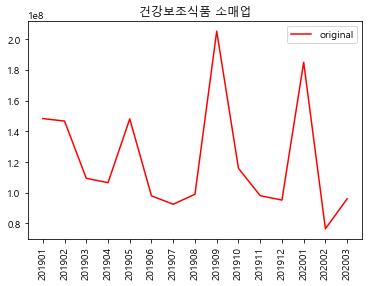

In [21]:
def subplot(ax, target_to_plot):
    d_orig = df_sample_pivot.loc[target_to_plot, :].fillna(0.0).to_numpy()
    
    ax.plot(d_orig, color='red', label="original")
    ax.set_xticks(range(len(year_values)))
    ax.set_xticklabels(year_values, rotation='vertical')
    ax.set_title(target_to_plot)
    ax.legend()

target_to_plot = "건강보조식품 소매업"
fig, ax = plt.subplots(1, 1)
subplot(ax, target_to_plot)
plt.show()

In [22]:
data.head()

REG_YYMM CARD_SIDO_NM STD_CLSS_NM HOM_SIDO_NM  AGE  FLC  CSTMR_CNT  \
0    201901           강원  건강보조식품 소매업          강원   20    1          4   
1    201901           강원  건강보조식품 소매업          강원   30    2          7   
2    201901           강원  건강보조식품 소매업          강원   30    2          6   
3    201901           강원  건강보조식품 소매업          강원   40    3          4   
4    201901           강원  건강보조식품 소매업          강원   40    4          3   

       AMT  CNT  male  female  
0   311200    4     1       0  
1  1374500    8     1       0  
2   818700    6     0       1  
3  1717000    5     1       0  
4  1047300    3     1       0

In [66]:
amt_cnt = data.groupby('STD_CLSS_NM').sum()[['AMT', 'CNT']].reset_index()

In [62]:
amt_cnt.head()

STD_CLSS_NM           AMT       CNT
0            건강보조식품 소매업  105126364380   1097627
1               골프장 운영업  595701968828   4951383
2           과실 및 채소 소매업  618928801283  24497628
3     관광 민예품 및 선물용품 소매업   15129406137    593750
4  그외 기타 분류안된 오락관련 서비스업      37246490      1410

In [53]:
per_amt = pd.DataFrame(amt_cnt.AMT//amt_cnt.CNT)

In [59]:
per_amt.columns = ['per_amt']

In [60]:
per_amt.head()

per_amt
0    95776
1   120310
2    25264
3    25481
4    26415

In [67]:
amt_cnt = pd.concat([amt_cnt, per_amt], axis = 1)

In [68]:
amt_cnt

STD_CLSS_NM             AMT        CNT  per_amt
0              건강보조식품 소매업    105126364380    1097627    95776
1                 골프장 운영업    595701968828    4951383   120310
2             과실 및 채소 소매업    618928801283   24497628    25264
3       관광 민예품 및 선물용품 소매업     15129406137     593750    25481
4    그외 기타 분류안된 오락관련 서비스업        37246490       1410    26415
5         그외 기타 스포츠시설 운영업      2731915234     140173    19489
6            그외 기타 종합 소매업   1025691118171   21529262    47641
7            기타 대형 종합 소매업   7328854819388  231338754    31680
8            기타 수상오락 서비스업      1671308986      50765    32922
9             기타 외국식 음식점업    623167678948   27306884    22820
10                 기타 주점업    164753620805    1641765   100351
11          기타음식료품위주종합소매업   1569246626978   81708225    19205
12              내항 여객 운송업     42015061681    1076981    39011
13                   마사지업     20199890964     190516   106027
14                    면세점    404512192532    4194293    96443
15                 버스 운송업    230236675997   19931420    11551
16               비알콜 음료점업   1143497863742  164698712     6942
17            빵 및 과자류 소매업    893591674917   88422041    10105
18               서양식 음식점업   1748358904526  116457610    15012
19                수산물 소매업    297031773253    6682528    44449
20                   슈퍼마켓   6730329364274  422258631    15938
21     스포츠 및 레크레이션 용품 임대업   1245725426753   14194845    87759
22                    여관업    258904036530    5895417    43916
23                   여행사업    109016697282     296628   367519
24                    욕탕업    190084640107   12320979    15427
25                 육류 소매업   1166039087386   36744934    31733
26               일반유흥 주점업    541315173187    4907804   110296
27                일식 음식점업    792341708115   18783026    42183
28                자동차 임대업     28378647000     178093   159347
29            전시 및 행사 대행업    104507444246    4846330    21564
30              정기 항공 운송업    581098689779    2453445   236850
31                중식 음식점업    952361423580   40648444    23429
32             차량용 가스 충전업    237066002143    6904051    34337
33            차량용 주유소 운영업   7708652073883  138163614    55793
34                체인화 편의점   5303958703193  786933354     6740
35                 택시 운송업   1733409541974  231011553     7503
36  피자 햄버거 샌드위치 및 유사 음식점업   1100581283937  111352234     9883
37                한식 음식점업  13737489719551  459130888    29920
38                    호텔업    225020352517    3663424    61423
39          화장품 및 방향제 소매업    639380260823   14456318    44228
40               휴양콘도 운영업     79881859506    1376779    58020

In [75]:
data[(data['AMT'] < 95776) & (data['CNT'] < 2)][data['STD_CLSS_NM'] == '건강보조식품 소매업']

C:\Users\82106\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


REG_YYMM CARD_SIDO_NM STD_CLSS_NM HOM_SIDO_NM  AGE  FLC  CSTMR_CNT  \
12          201901           강원  건강보조식품 소매업          강원   40    3          3   
8452254     201906           경기  건강보조식품 소매업          경기   40    2          3   
9959705     201906           충북  건강보조식품 소매업          서울   50    5          3   
13179584    201908           인천  건강보조식품 소매업          서울   70    5          3   
16382017    201910           서울  건강보조식품 소매업          서울   40    2          3   
22490648    202002           경남  건강보조식품 소매업          경남   30    2          3   

            AMT  CNT  male  female  
12        24000    1     0       1  
8452254   74000    1     1       0  
9959705   55000    1     0       1  
13179584  50000    1     1       0  
16382017  15000    1     0       1  
22490648   1950    1     0       1

In [76]:
data[(data['AMT'] < 120310) & (data['CNT'] < 2)][data['STD_CLSS_NM'] == '골프장 운영업']

C:\Users\82106\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


REG_YYMM CARD_SIDO_NM STD_CLSS_NM HOM_SIDO_NM  AGE  FLC  CSTMR_CNT  \
1530963     201901           충남     골프장 운영업          광주   40    3          3   
11644114    201907           충남     골프장 운영업          충북   40    3          3   
13511126    201908           충남     골프장 운영업          대전   40    2          3   
13511151    201908           충남     골프장 운영업          대전   30    2          3   
13511356    201908           충남     골프장 운영업          충북   30    3          4   

             AMT  CNT  male  female  
1530963    94000    1     1       0  
11644114  111300    1     0       1  
13511126  104600    1     0       1  
13511151   63370    1     1       0  
13511356  104000    1     0       1

In [77]:
data[(data['AMT'] < 25264) & (data['CNT'] < 2)][data['STD_CLSS_NM'] == '과실 및 채소 소매업']

C:\Users\82106\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


REG_YYMM CARD_SIDO_NM  STD_CLSS_NM HOM_SIDO_NM  AGE  FLC  CSTMR_CNT  \
20881071    202001           경남  과실 및 채소 소매업          대구   50    5          3   

            AMT  CNT  male  female  
20881071  25000    1     0       1

In [41]:
cnt_data = data.groupby('REG_YYMM').sum()[['CNT']].reset_index()

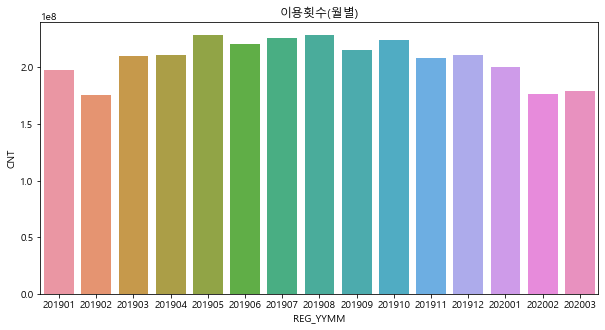

In [44]:
ax_01 = plt.subplots(figsize = (10, 5))
ax_01 = sns.barplot(x = 'REG_YYMM', y = 'CNT', data = cnt_data)
ax_01.set_title('이용횟수(월별)')
plt.show()

In [24]:
temp = data.groupby(['REG_YYMM', 'STD_CLSS_NM']).sum().reset_index()

In [26]:
temp[temp.REG_YYMM == 201901]

REG_YYMM            STD_CLSS_NM      AGE     FLC  CSTMR_CNT           AMT  \
0     201901             건강보조식품 소매업   277050   22449      65982    8605074944   
1     201901                골프장 운영업   378600   30632     101473   11968748603   
2     201901            과실 및 채소 소매업  1419370  112694    1051062   44453112689   
3     201901      관광 민예품 및 선물용품 소매업   180550   13529      30059     955750428   
4     201901   그외 기타 분류안된 오락관련 서비스업      240      18         19       1017500   
5     201901        그외 기타 스포츠시설 운영업    39290    2852      10237     305925950   
6     201901           그외 기타 종합 소매업   874960   67152     730338   73748981612   
7     201901           기타 대형 종합 소매업  3852110  289475    7372310  538843857358   
8     201901           기타 수상오락 서비스업    16610    1188       2476     127107192   
9     201901            기타 외국식 음식점업  1453980  109619    1599953   45665083827   
10    201901                 기타 주점업   198440   15610      80243   11440224026   
11    201901          기타음식료품위주종합소매업  1349430  105673    1594923  103518868919   
12    201901              내항 여객 운송업   144680   11343      29682    2087130198   
13    201901                   마사지업    45040    3462       8252    1226678092   
14    201901                    면세점   438020   33565     235110   35281192511   
15    201901                 버스 운송업   437540   33247     855574   15965527184   
16    201901               비알콜 음료점업  3397930  248457    5747495   68371106809   
17    201901            빵 및 과자류 소매업  2459470  183143    4143601   62532348072   
18    201901               서양식 음식점업  2988450  217511    4655610  113549549718   
19    201901                수산물 소매업   778560   62487     366030   23185280363   
20    201901                   슈퍼마켓  3891560  296344    9758864  446478942778   
21    201901     스포츠 및 레크레이션 용품 임대업  1186080   91577     643295   78021981663   
22    201901                    여관업   849090   63098     307947   18884783157   
23    201901                   여행사업   135090   10752      17185   13039593948   
24    201901                    욕탕업   881870   68276     732253   17604990872   
25    201901                 육류 소매업   982570   77697    1680763   82167087718   
26    201901               일반유흥 주점업   429570   31633     230888   38432891407   
27    201901                일식 음식점업  1313030   97115    1129425   56720672816   
28    201901                자동차 임대업    55550    4143       8540    1184211488   
29    201901            전시 및 행사 대행업   680540   50365     155999    5707804120   
30    201901              정기 항공 운송업   325100   24462     168320   48202786679   
31    201901                중식 음식점업  1621740  121073    2080228   62665004697   
32    201901             차량용 가스 충전업   620830   49539     290053   16846765168   
33    201901            차량용 주유소 운영업  4254710  334058    5586923  483447902660   
34    201901                체인화 편의점  7047140  517822   16417928  316314464923   
35    201901                 택시 운송업   918550   68783    5254056  107747926483   
36    201901  피자 햄버거 샌드위치 및 유사 음식점업  2978590  213609    4990351   75362999290   
37    201901                한식 음식점업  9302610  709711   19635314  944187262326   
38    201901                    호텔업   480060   36330     157021   19810557915   
39    201901          화장품 및 방향제 소매업  1015000   76119     921366   49431741234   
40    201901               휴양콘도 운영업   445220   33683      86973    8224321688   

         CNT      male   female  
0      80305    2647.0   3367.0  
1     152181    6145.0   2424.0  
2    1597593   16275.0  16555.0  
3      36811    2352.0   2581.0  
4         27       6.0      0.0  
5      16440     608.0    487.0  
6    1383774   11823.0  10310.0  
7   16171648   54763.0  48287.0  
8       3675     364.0    111.0  
9    1947442   23606.0  14782.0  
10    110892    3702.0   1297.0  
11   5418474   19026.0  14159.0  
12     56816    2235.0   1411.0  
13     10809     864.0    241.0  
14    349807    5937.0   5364.0  
15   1426887    6011.0   5666.0  
16   9348169   52561.0 

In [33]:
temp.head()

REG_YYMM           STD_CLSS_NM      AGE     FLC  CSTMR_CNT          AMT  \
0    201901            건강보조식품 소매업   277050   22449      65982   8605074944   
1    201901               골프장 운영업   378600   30632     101473  11968748603   
2    201901           과실 및 채소 소매업  1419370  112694    1051062  44453112689   
3    201901     관광 민예품 및 선물용품 소매업   180550   13529      30059    955750428   
4    201901  그외 기타 분류안된 오락관련 서비스업      240      18         19      1017500   

       CNT     male   female  
0    80305   2647.0   3367.0  
1   152181   6145.0   2424.0  
2  1597593  16275.0  16555.0  
3    36811   2352.0   2581.0  
4       27      6.0      0.0

In [35]:
temp_01 = temp[temp.STD_CLSS_NM == '건강보조식품 소매업'][['REG_YYMM','AMT']]

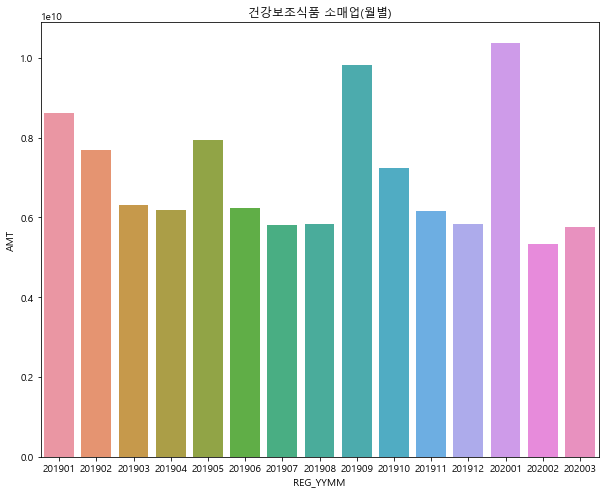

In [37]:
ax = plt.subplots(figsize = (10, 8))
ax = sns.barplot(x = 'REG_YYMM', y = 'AMT', data = temp_01)
ax.set_title('건강보조식품 소매업(월별)')
plt.show()

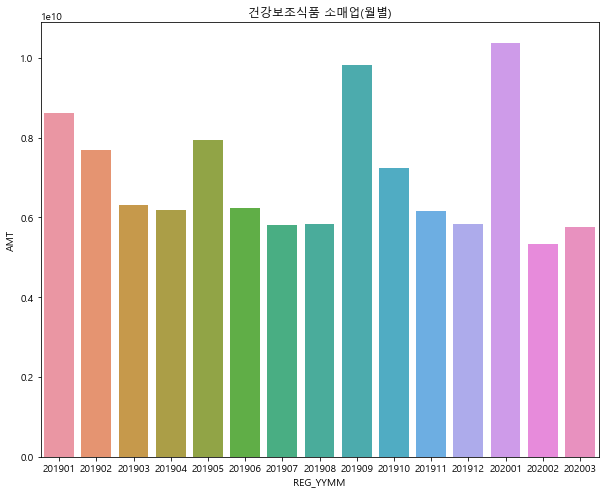

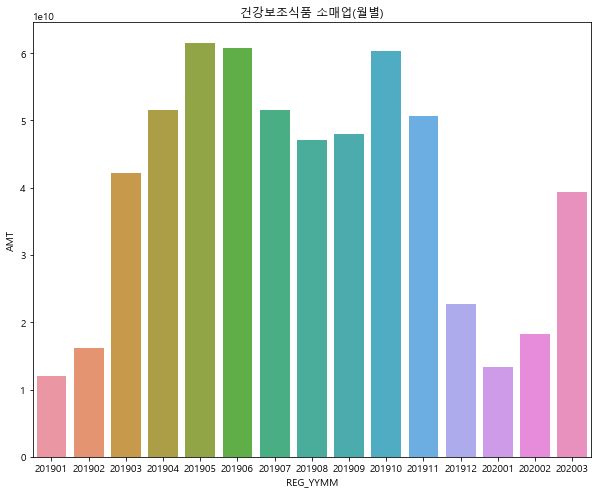

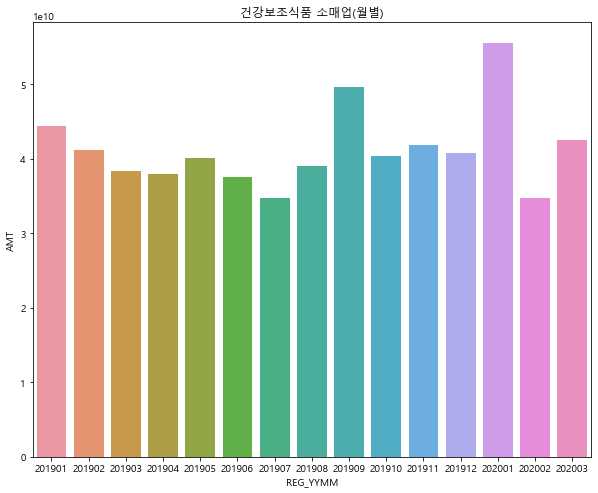

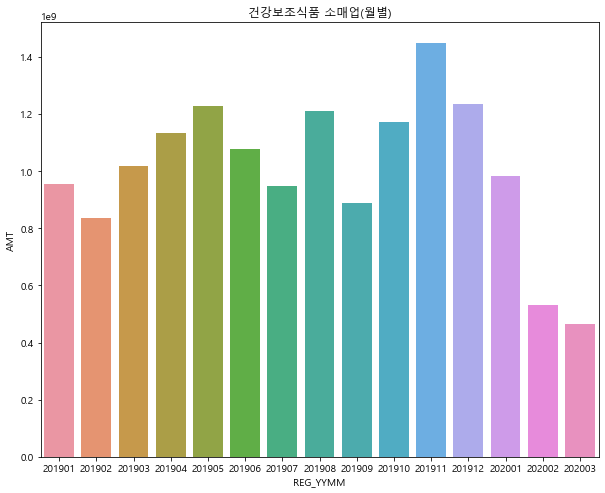

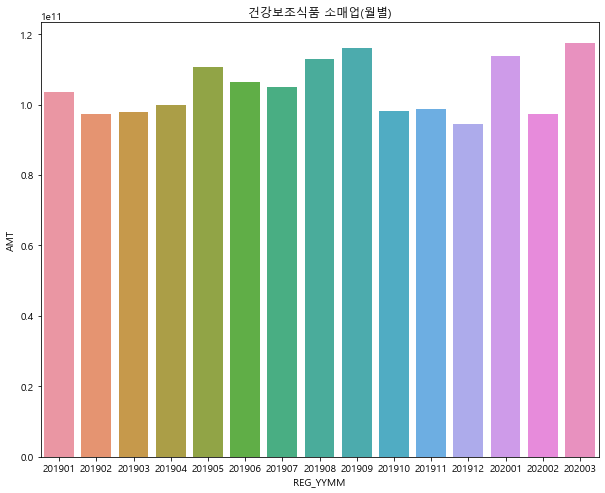

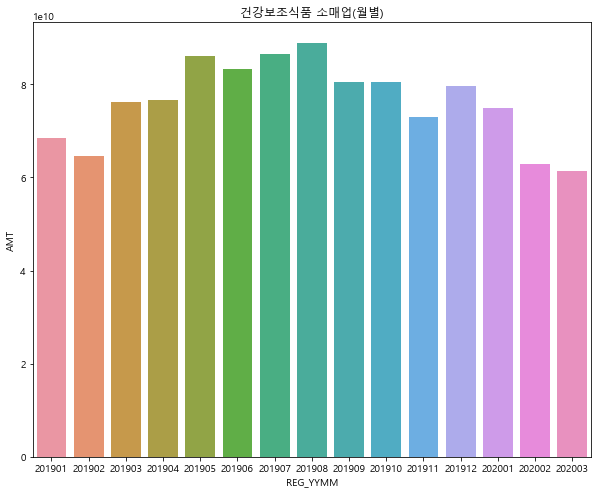

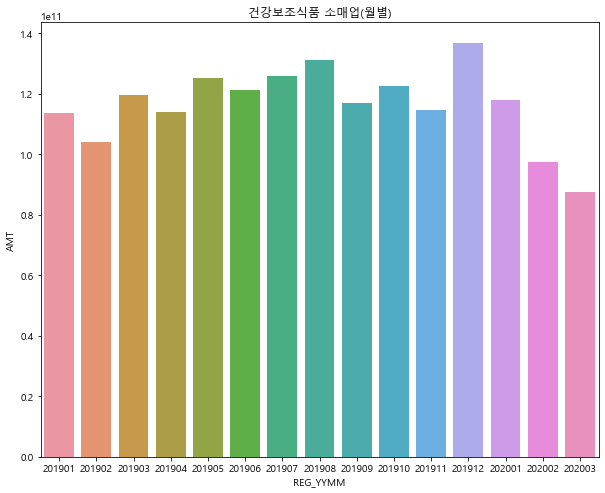

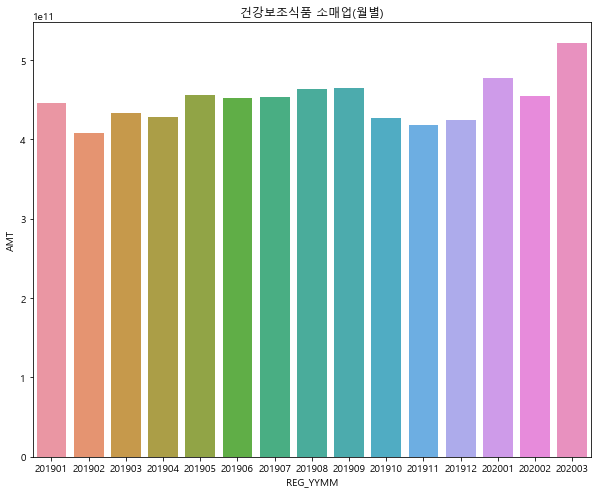

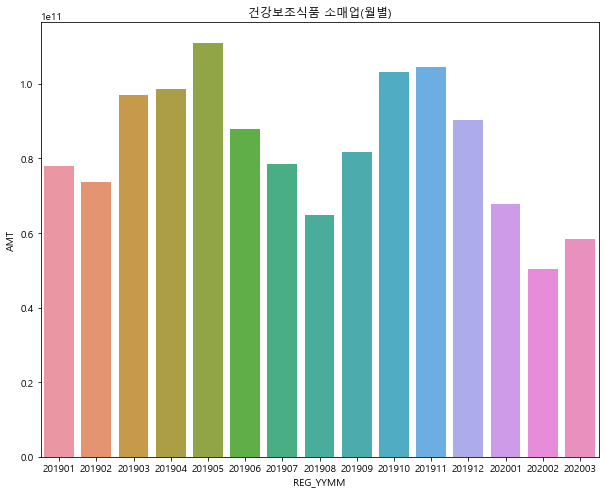

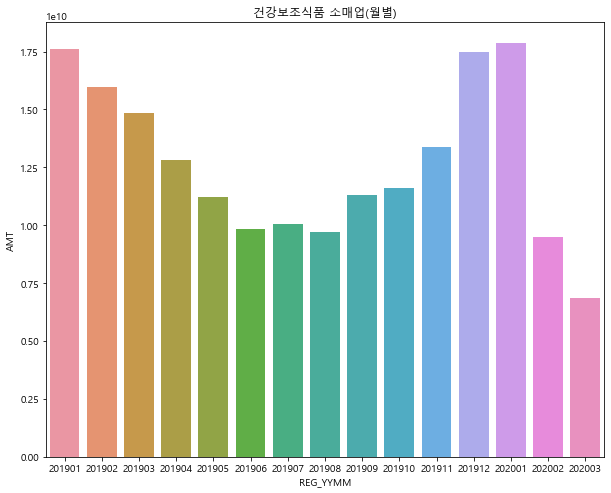

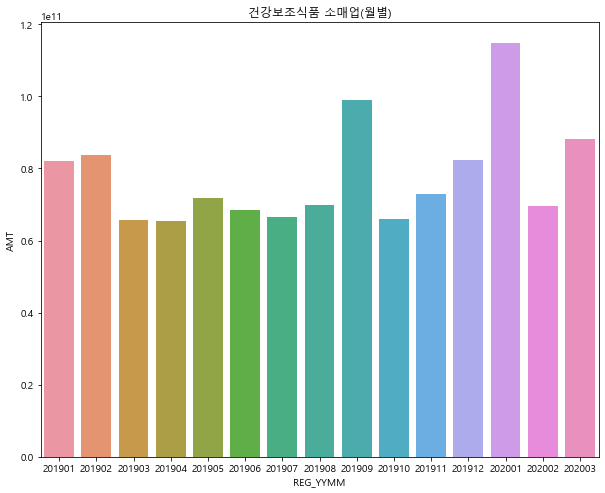

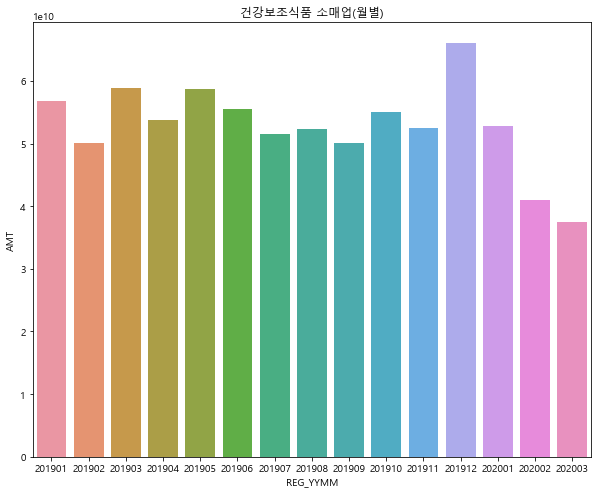

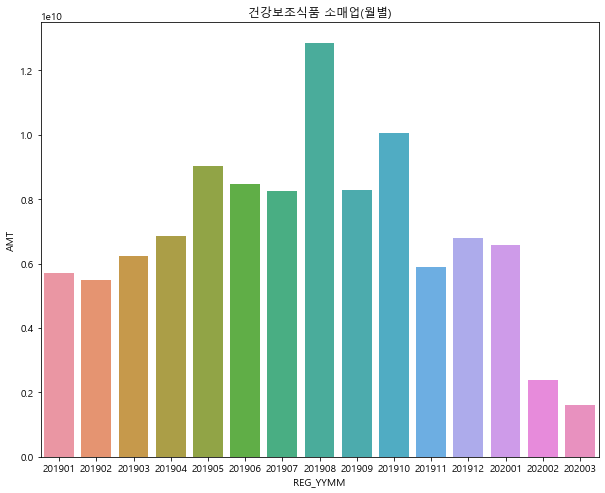

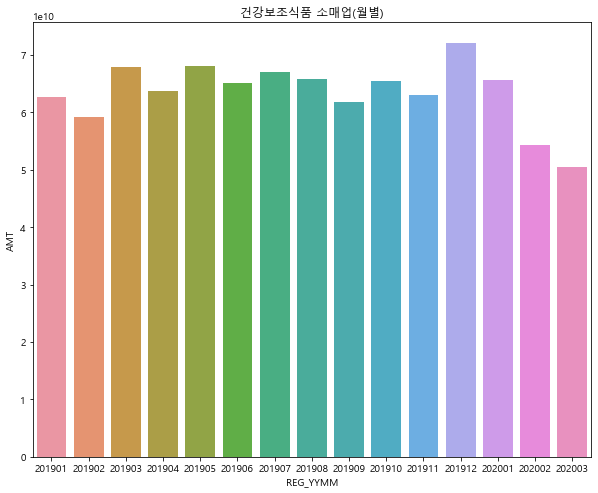

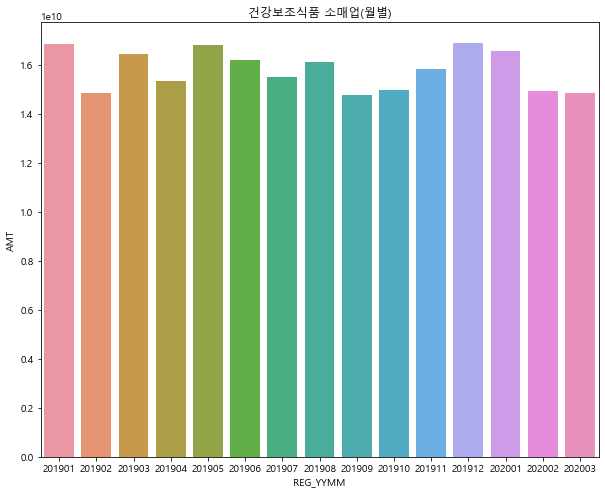

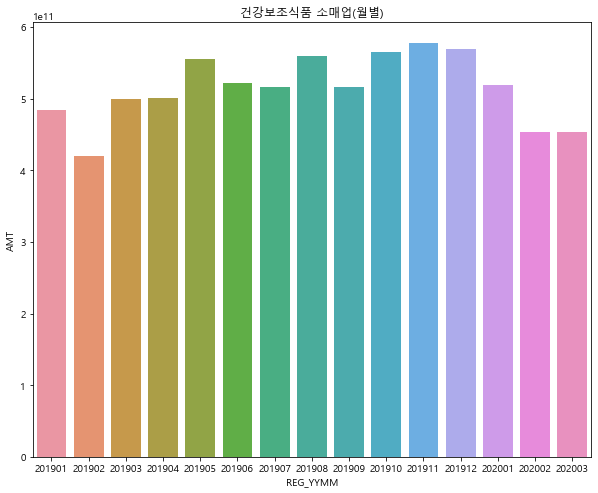

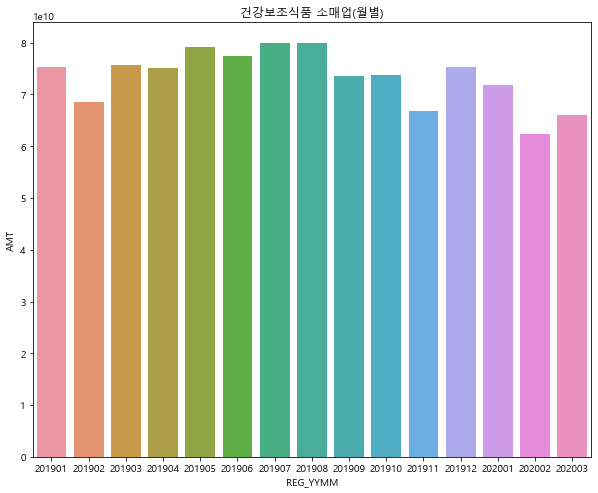

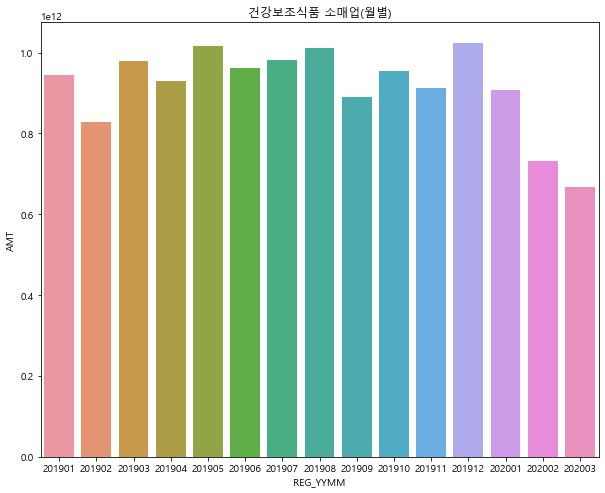

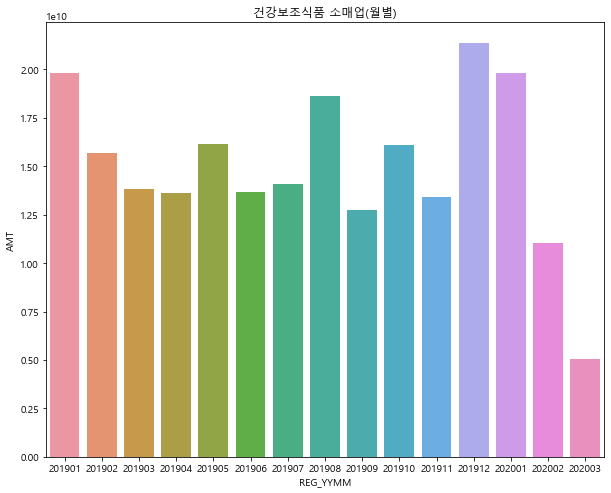

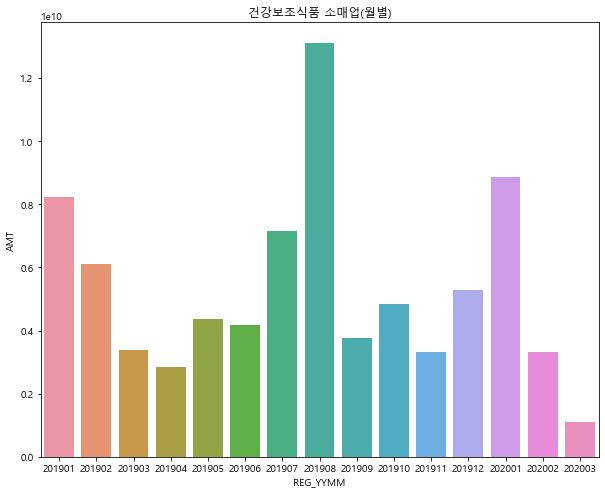

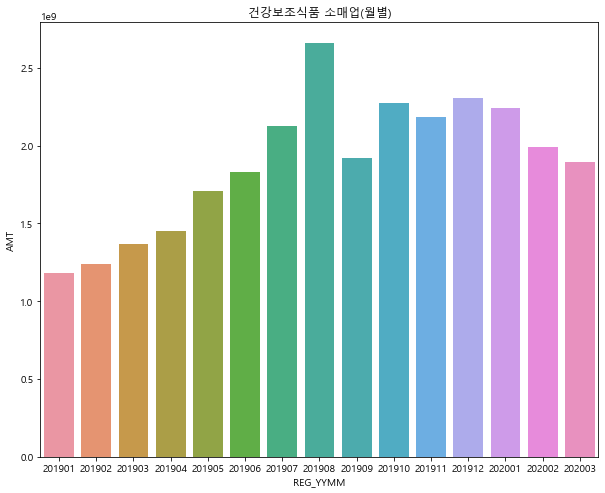

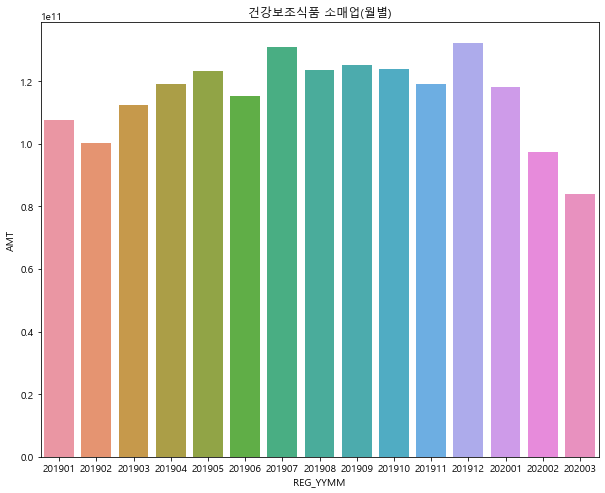

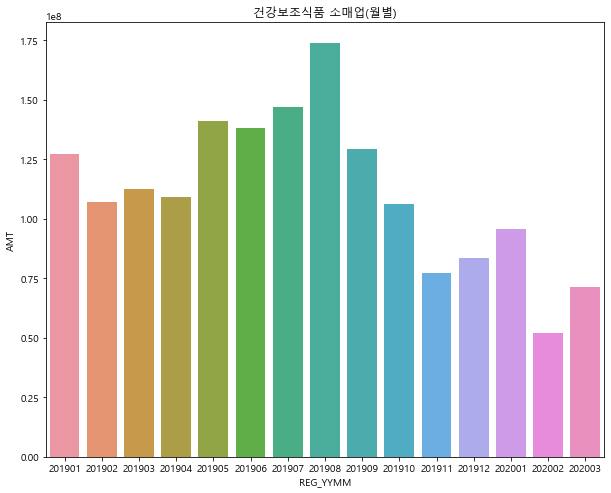

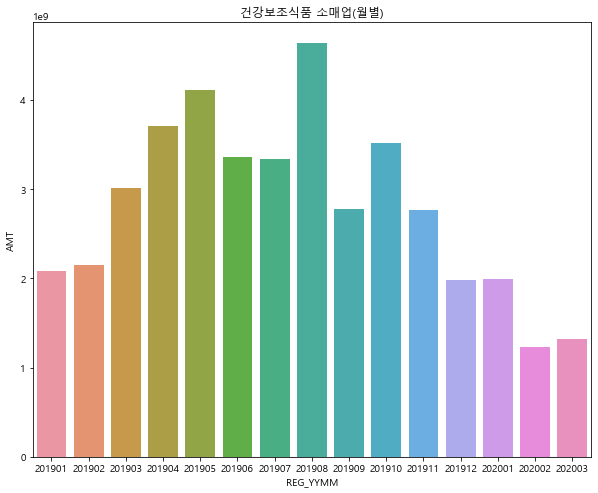

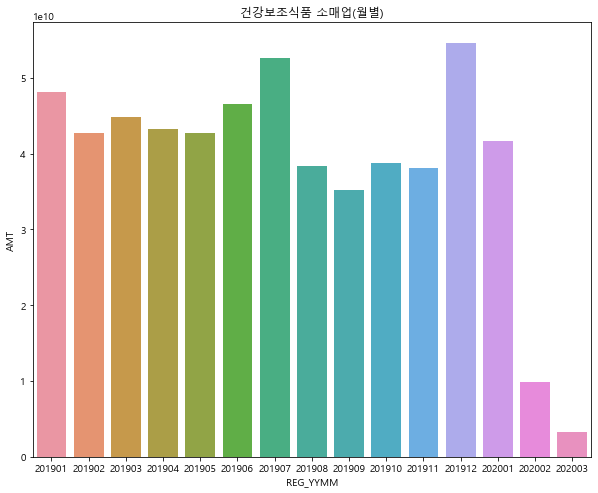

In [38]:
for col in std_class_values:
    temp_01 = temp[temp.STD_CLSS_NM == col][['REG_YYMM','AMT']]
    ax = plt.subplots(figsize = (10, 8))
    ax = sns.barplot(x = 'REG_YYMM', y = 'AMT', data = temp_01)
    ax.set_title('건강보조식품 소매업(월별)')
    plt.show()

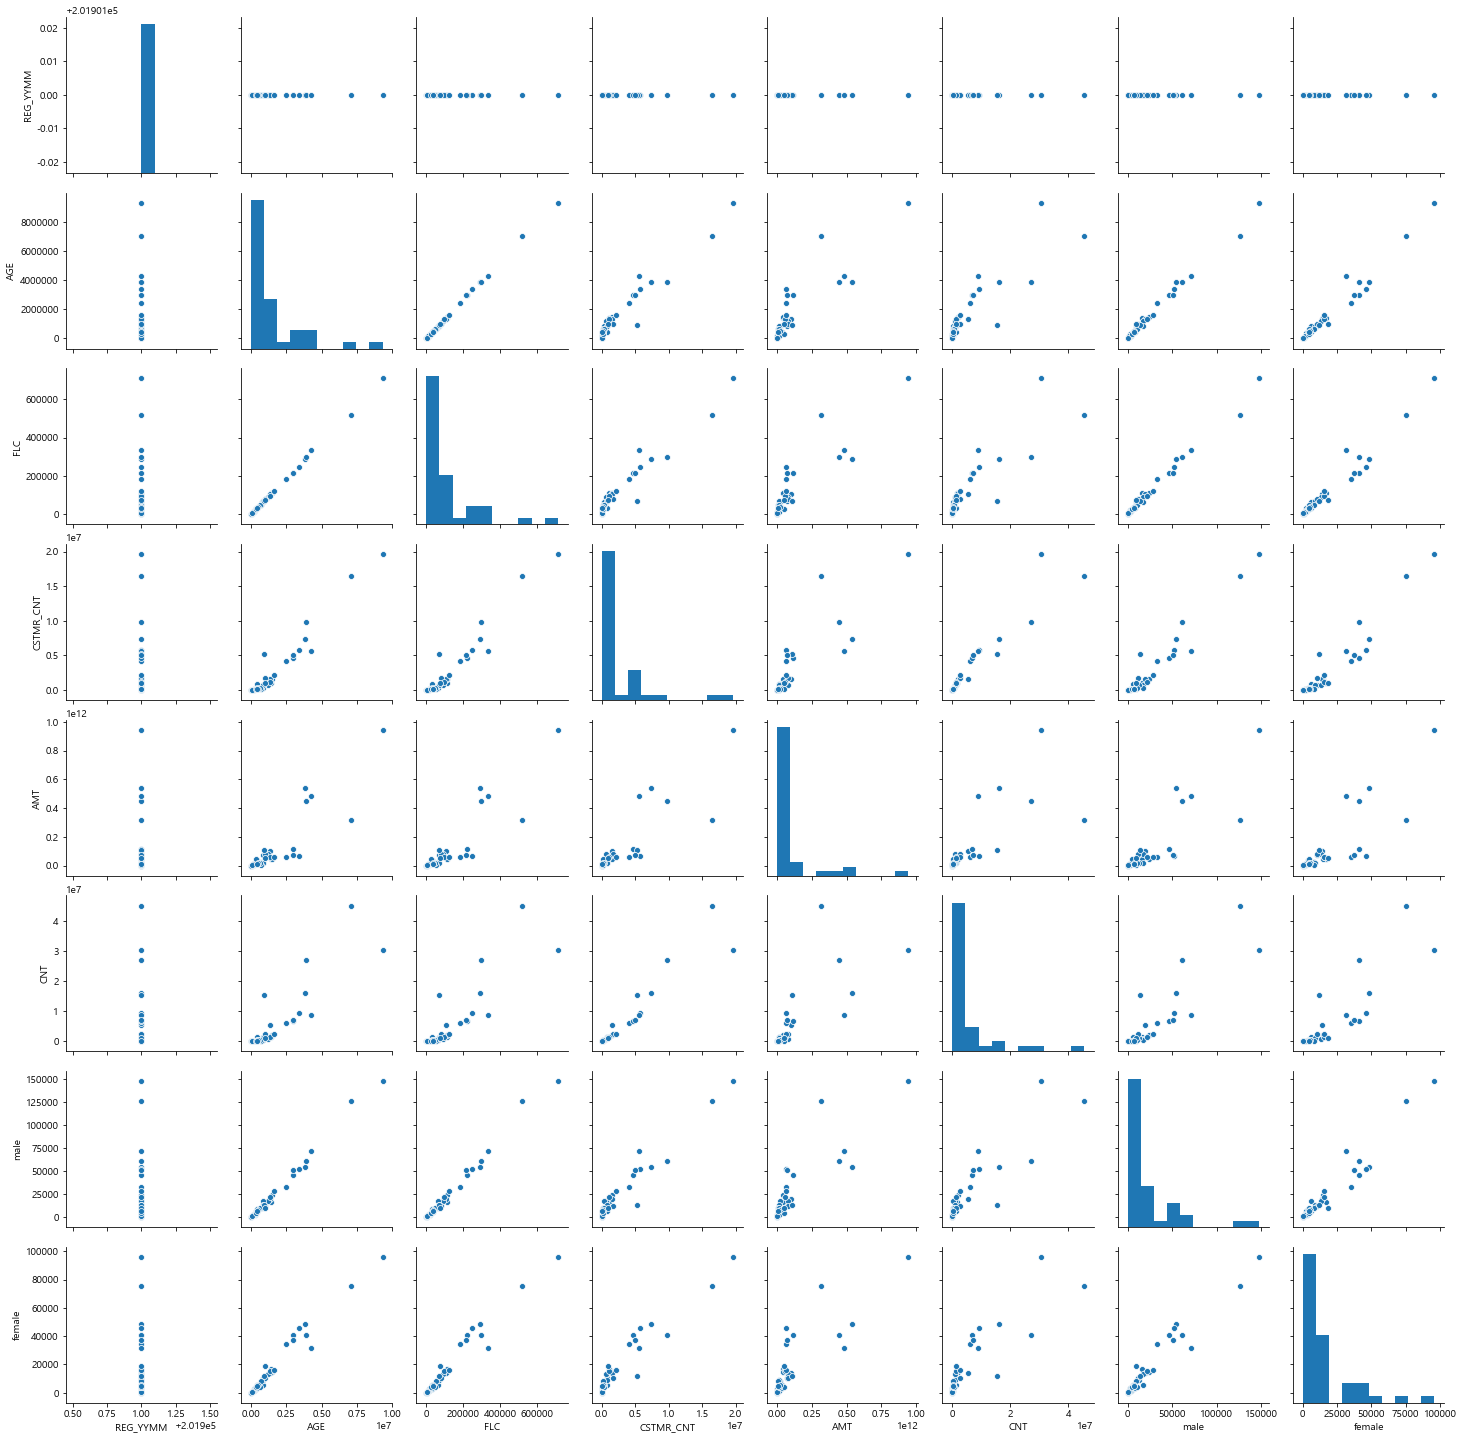

In [27]:
sns.pairplot(temp[temp.REG_YYMM == 201901])
plt.show()

In [ ]:
sns.pairplot(sample)
plt.title('pairplot')
plt.show()